In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [3]:
def read_tsp(name): # Read the tsp file and create a list of the nodes coordinates

    lines = open(name, 'r').readlines() # Open the file and devide it in lines
    nodes = []

    for line in lines[lines.index('NODE_COORD_SECTION\n') + 1:lines.index('EOF\n')]: # Loop only through the lines of interest in the file
        _, x, y = map(float, line.split()) # Extract the x and y of the coordinates for each node/line
        nodes.append((x, y))

    return np.array(nodes)

def distance_matrix(nodes): # Create a matrix that contains every distance between each node

    n = len(nodes)
    dist_matrix = np.zeros((n, n)) # Create an empty nxn matrix

    for i in range(n): # Loop through each node and calculate the distance between this node and all the others for each other node
        for j in range(n):
            dist_matrix[i, j] = np.linalg.norm(nodes[i] - nodes[j])

    return dist_matrix

def tot_distance(tour, dist_matrix): # Calculate the total distance of the tour

    return sum(dist_matrix[tour[i], tour[i+1]] for i in range(len(tour) - 1)) + dist_matrix[tour[-1], tour[0]] # Sum the distancec between the nodes in the tour (in their order), plus the distance between the last and first node (the salesman must come back to the first node)

def two_opt(tour, i, k): # Perform two opt swap

    return tour[:i] + tour[i:k+1][::-1] + tour[k+1:] # Reverse the segment of the tour between node i and node j 

def simulated_annealing(dist_matrix, T0, cooling_rate, mc_length, max_iterations): # Perform optimization of the total distance through simulated annealing
    
    # Create a random starting tour and calculate its total distance
    n = len(dist_matrix)
    present_tour = list(range(n))
    random.shuffle(present_tour)
    present_dist = tot_distance(present_tour, dist_matrix)

    # Set the best-so-far tour and distance to the random one just created
    opt_tour = present_tour[:]
    opt_dist = present_dist

    T = T0 # Set an initial temperature

    dic_result = {}

    for iteration in range(max_iterations): # Loop through a maximum number of iterations
        for _ in range(mc_length): # Loop through a markov chain before updating the temperature
            i, k = sorted(random.sample(range(n), 2)) # Randomly pick i and j (such that i<j) to perform two opt
            new_tour = two_opt(present_tour, i, k)
            new_dist = tot_distance(new_tour, dist_matrix) # Calculate the total distance of this new tour

            # If the new distance is lower that the best-so-far one or a random number is lower than the temperature-based parameter computed below (set to be maximum = 1), focus on the new tour found
            if new_dist < present_dist or random.random() <= min(math.exp((present_dist - new_dist) / T), 1): 
                present_tour, present_dist = new_tour, new_dist

                if present_dist < opt_dist: # Update the estimates if this new tour is shorter that the best-so-far
                    opt_tour, opt_dist = present_tour[:], present_dist
                
        T *= cooling_rate # Upgrade the temperature according the cooling rate
        if T < 1e-12: # Break the loop if the temperature becomes too small
            break

        dic_result[iteration] = opt_dist

    return opt_tour, opt_dist, dic_result

def read_tsp_opt(name): # Read the file containing the optimum lenght 

    lines = open(name, 'r').readlines() # Create a list of all the lines
    nodes = []

    for line in lines[lines.index('TOUR_SECTION\n') + 1:lines.index('-1\n') + 1]: # Loop only through the lines of interest in the file
        if int(line) != -1: # Other than the last line (which indicates to come back to the first node), deacrease the line-value by one to reflect python-indexes style
            nodes.append(int(line) - 1)

    return np.array(nodes) # Return the true optimal tour

In [ ]:
# Read the file, calculate the data of the problem (nodes coordinates and distance matrix)
name = "eil51.tsp.txt"
nodes = read_tsp(name)
dist_matrix = distance_matrix(nodes)

# Set the parameters
T0 = 1000
cooling_rate = 0.995
mc_length = 1000
max_iterations = 10000

# Perform simulated annealing
opt_tour, opt_dist, _ = simulated_annealing(dist_matrix, T0, cooling_rate, mc_length, max_iterations)

# Print solution
print('Shortest tour: ', opt_tour)
print('Distance: ', opt_dist)

# Compute the true optimal distance from the provided files and compare it with the obtained solution
true_opt = tot_distance(tour = read_tsp_opt("eil51.opt.tour.txt"), dist_matrix = dist_matrix)
print(f'True optimal distance: {true_opt}; difference = {opt_dist - true_opt}')

Iteration 0: opt distance: 1408.0188514869685
Iteration 1: opt distance: 1343.6794214096487
Iteration 2: opt distance: 1343.6794214096487
Iteration 3: opt distance: 1343.6794214096487
Iteration 4: opt distance: 1343.6794214096487
Iteration 5: opt distance: 1343.6794214096487
Iteration 6: opt distance: 1343.6794214096487
Iteration 7: opt distance: 1343.6794214096487
Iteration 8: opt distance: 1343.6794214096487
Iteration 9: opt distance: 1343.6794214096487
Iteration 10: opt distance: 1343.6794214096487
Iteration 11: opt distance: 1343.6794214096487
Iteration 12: opt distance: 1343.6794214096487
Iteration 13: opt distance: 1343.6794214096487
Iteration 14: opt distance: 1343.6794214096487
Iteration 15: opt distance: 1343.6794214096487
Iteration 16: opt distance: 1309.2599535819531
Iteration 17: opt distance: 1309.2599535819531
Iteration 18: opt distance: 1214.5964427596396
Iteration 19: opt distance: 1214.5964427596396
Iteration 20: opt distance: 1214.5964427596396
Iteration 21: opt dista

In [ ]:
# Read the file, calculate the data of the problem (nodes coordinates and distance matrix)
name = "a280.tsp.txt"
nodes = read_tsp(name)
dist_matrix = distance_matrix(nodes)

# Set the parameters
T0 = 1000
cooling_rate = 0.9993
mc_length = 500
max_iterations = 11000

# Perform simulated annealing
opt_tour, opt_dist, _ = simulated_annealing(dist_matrix, T0, cooling_rate, mc_length, max_iterations)

# Print solution
print('Shortest tour: ', opt_tour)
print('Distance: ', opt_dist)

# Compute the true optimal distance from the provided files and compare it with the obtained solution
true_opt = tot_distance(tour = read_tsp_opt("a280.opt.tour.txt"), dist_matrix = dist_matrix)
print(f'True optimal distance: {true_opt}; difference = {opt_dist - true_opt}')

Iteration 0: opt distance: 30916.875988814376
Iteration 1: opt distance: 29791.795620953715
Iteration 2: opt distance: 29791.795620953715
Iteration 3: opt distance: 29791.795620953715
Iteration 4: opt distance: 29791.795620953715
Iteration 5: opt distance: 29791.795620953715
Iteration 6: opt distance: 29791.795620953715
Iteration 7: opt distance: 29791.795620953715
Iteration 8: opt distance: 29791.795620953715
Iteration 9: opt distance: 29791.795620953715
Iteration 10: opt distance: 29791.795620953715
Iteration 11: opt distance: 29791.795620953715
Iteration 12: opt distance: 29791.795620953715
Iteration 13: opt distance: 29791.795620953715
Iteration 14: opt distance: 29791.795620953715
Iteration 15: opt distance: 29791.795620953715
Iteration 16: opt distance: 29791.795620953715
Iteration 17: opt distance: 29791.795620953715
Iteration 18: opt distance: 29791.795620953715
Iteration 19: opt distance: 29791.795620953715
Iteration 20: opt distance: 29791.795620953715
Iteration 21: opt dista

In [ ]:
# Read the file, calculate the data of the problem (nodes coordinates and distance matrix)
name = "pcb442.tsp.txt"
nodes = read_tsp(name)
dist_matrix = distance_matrix(nodes)

# Set the parameters
T0 = 1000
cooling_rate = 0.9993
mc_length = 500
max_iterations = 11000

# Perform simulated annealing
opt_tour, opt_dist, _ = simulated_annealing(dist_matrix, T0, cooling_rate, mc_length, max_iterations)

# Print solution
print('Shortest tour: ', opt_tour)
print('Distance: ', opt_dist)

# Compute the true optimal distance from the provided files and compare it with the obtained solution
true_opt = tot_distance(tour = read_tsp_opt("pcb442.opt.tour.txt"), dist_matrix = dist_matrix)
print(f'True optimal distance: {true_opt}; difference = {opt_dist - true_opt}')

Iteration 0: opt distance: 618480.5087004541
Iteration 1: opt distance: 586302.7524198251
Iteration 2: opt distance: 565743.1108223585
Iteration 3: opt distance: 530192.8801310868
Iteration 4: opt distance: 513129.8523100561
Iteration 5: opt distance: 513129.8523100561
Iteration 6: opt distance: 505952.3722588686
Iteration 7: opt distance: 505952.3722588686
Iteration 8: opt distance: 505952.3722588686
Iteration 9: opt distance: 505952.3722588686
Iteration 10: opt distance: 505952.3722588686
Iteration 11: opt distance: 505952.3722588686
Iteration 12: opt distance: 505952.3722588686
Iteration 13: opt distance: 505952.3722588686
Iteration 14: opt distance: 505952.3722588686
Iteration 15: opt distance: 505952.3722588686
Iteration 16: opt distance: 505952.3722588686
Iteration 17: opt distance: 505952.3722588686
Iteration 18: opt distance: 498597.70866387564
Iteration 19: opt distance: 494209.6926798905
Iteration 20: opt distance: 484734.7631678598
Iteration 21: opt distance: 483943.17452762

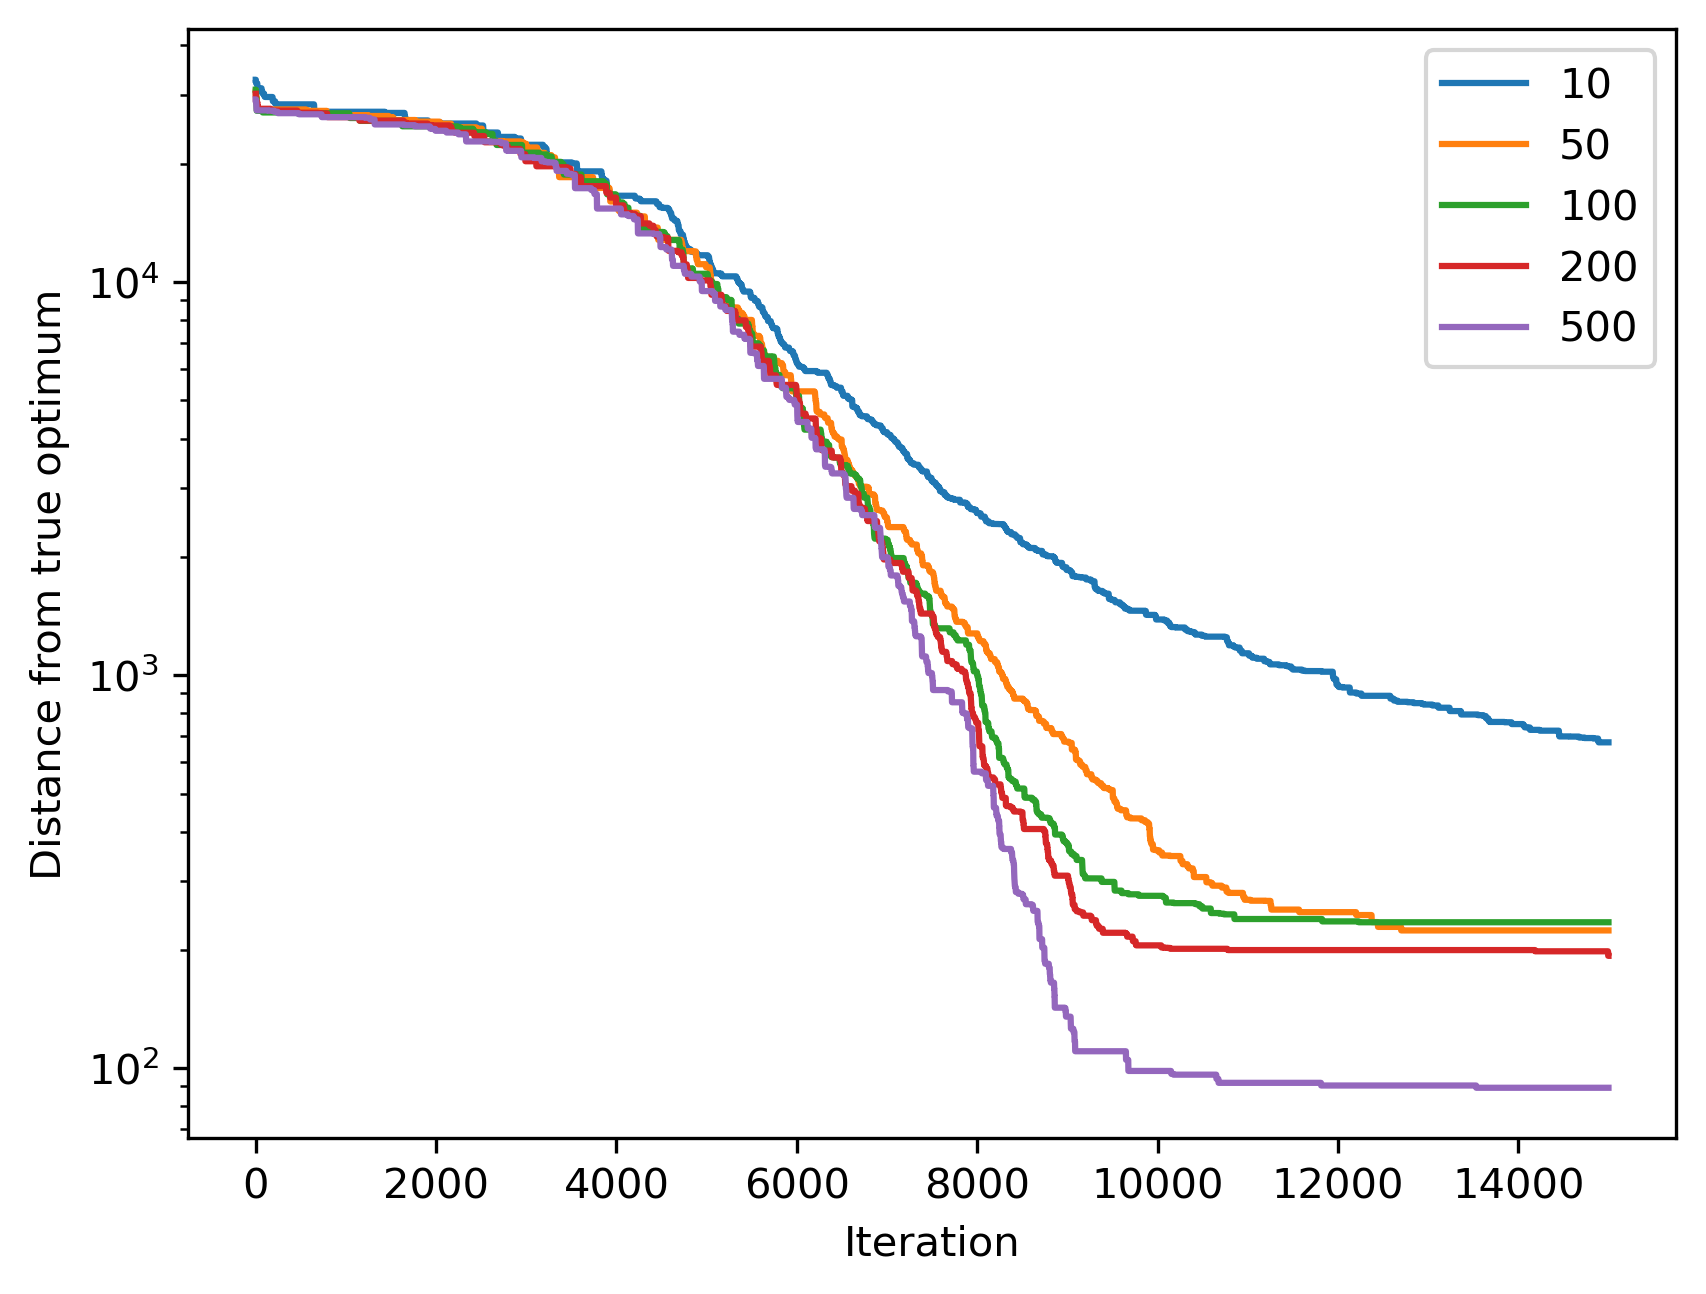

In [7]:
# Read the file, calculate the data of the problem (nodes coordinates and distance matrix)
name = "a280.tsp.txt"
nodes = read_tsp(name)
dist_matrix = distance_matrix(nodes)

# Set the parameters
T0 = 1000
cooling_rate = 0.9993
max_iterations = 15000

true_opt = tot_distance(tour = read_tsp_opt("a280.opt.tour.txt"), dist_matrix = dist_matrix)

plt.figure(dpi = 300)
for mc in [10, 50, 100, 200, 500]:
    _, _, dic_result = simulated_annealing(dist_matrix, T0, cooling_rate, mc_length = mc, max_iterations = max_iterations)
    plt.plot(list(dic_result.keys()), np.array(list(dic_result.values())) - true_opt, label = str(mc))

plt.xlabel('Iteration')
plt.ylabel('Distance from true optimum')
plt.yscale('log')
plt.legend()
plt.show()

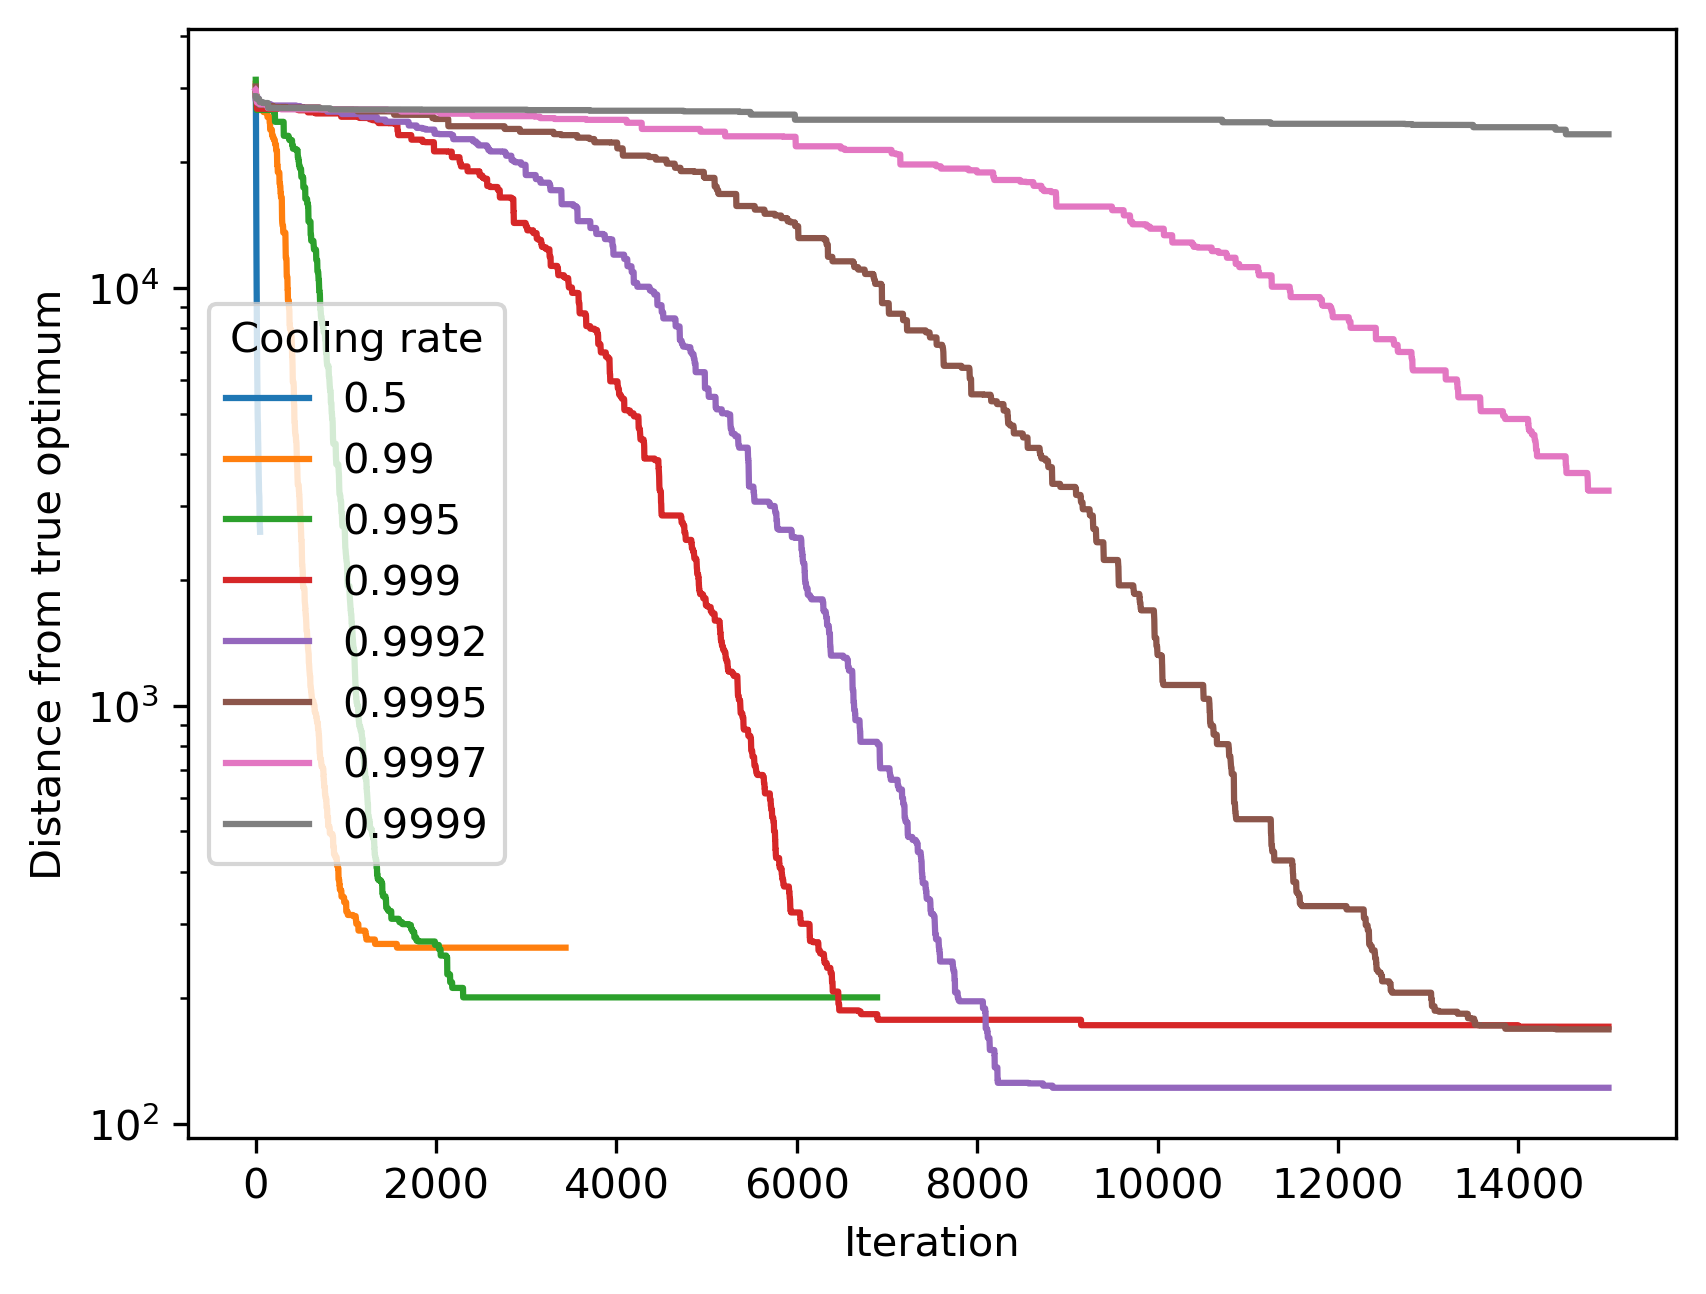

In [11]:
# Read the file, calculate the data of the problem (nodes coordinates and distance matrix)
name = "a280.tsp.txt"
nodes = read_tsp(name)
dist_matrix = distance_matrix(nodes)

# Set the parameters
T0 = 1000
max_iterations = 15000
mc_length = 400

true_opt = tot_distance(tour = read_tsp_opt("a280.opt.tour.txt"), dist_matrix = dist_matrix)

plt.figure(dpi = 300)
for cooling_rate in [0.5, 0.99, 0.995, 0.999, 0.9992, 0.9995, 0.9997, 0.9999]:
    _, _, dic_result = simulated_annealing(dist_matrix, T0, cooling_rate, mc_length, max_iterations)
    plt.plot(list(dic_result.keys()), np.array(list(dic_result.values())) - true_opt, label = str(cooling_rate))

plt.xlabel('Iteration')
plt.ylabel('Distance from true optimum')
plt.yscale('log')
plt.legend(title = 'Cooling rate')
plt.show()